In [1]:
!git clone https://github.com/AF-55/Quod_THA.git

Cloning into 'Quod_THA'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Receiving objects: 100% (5/5), 9.63 MiB | 5.37 MiB/s, done.


In [2]:
import pandas as pd

In [9]:
transactions_1 = pd.read_csv('/content/Quod_THA/transactions_1.csv')

transactions_1.head(), len(transactions_1)

(   Unnamed: 0  customer_id  product_id                      date
 0           0      8649525        Opel  2017-01-31T09:31:08.873Z
 1           1      8649525  Volkswagen  2017-02-03T16:59:16.610Z
 2           2      8649525  Volkswagen  2017-02-05T19:47:55.353Z
 3           3      8649525  Volkswagen  2017-02-05T19:48:14.633Z
 4           4      8649525  Volkswagen  2017-02-06T09:59:49.053Z,
 500000)

In [8]:
transactions_2 = pd.read_csv('/content/Quod_THA/transactions_2.csv')

transactions_2.head(), len(transactions_2)

(   Unnamed: 0  customer_id product_id                      date
 0      500000      8822663     Abarth  2018-06-28T09:19:11.130Z
 1      500001      8822663    Peugeot  2019-07-17T08:06:29.500Z
 2      500002      8822663     Nissan  2017-06-22T07:29:22.440Z
 3      500003      8822663     Nissan  2017-06-22T07:50:10.863Z
 4      500004      8822663     Nissan  2017-06-22T08:40:35.923Z,
 475955)

In [36]:
df = pd.concat([transactions_1, transactions_2])
len(df)

975955

In [37]:
pd.unique(transactions.product_id)

array(['Peugeot', 'Fiat', 'Abarth', 'Audi', 'Nissan', 'Opel', 'Citroen',
       'Toyota', 'Volkswagen', 'Renault', 'BMW', 'Piaggio', 'Alfa Romeo',
       'Ford', 'Volvo', 'Mercedes Benz', 'Seat', 'Skoda', 'Lancia',
       'Mitsubishi', 'Kia', 'Honda', 'Infiniti', 'Iveco', 'Land Rover',
       'Hyundai', 'Mini', 'Chevrolet', 'Mazda', 'Lexus', 'Jaguar',
       'Dacia', 'Chrysler', 'Porsche', 'Jeep', 'Suzuki', 'Ssangyong',
       'Tesla', 'DS', 'Subaru', 'Oxygen', 'Harley-Davidson', 'Tata',
       'Equipe', 'Smart', 'Isuzu', 'ATS', 'Yamaha'], dtype=object)

In [38]:
df['product_id'] = df['product_id'].replace("├ÅTS", "ATS").replace("MCC/Smart", "Smart")
pd.unique(df.product_id)

array(['Opel', 'Volkswagen', 'BMW', 'Abarth', 'Audi', 'Seat', 'Peugeot',
       'Mercedes Benz', 'Renault', 'Lancia', 'Fiat', 'Skoda', 'Toyota',
       'Citroen', 'Nissan', 'Ssangyong', 'Volvo', 'Jaguar', 'Ford',
       'Alfa Romeo', 'DS', 'Mini', 'Lexus', 'Mazda', 'Kia', 'Hyundai',
       'Jeep', 'Land Rover', 'Chevrolet', 'Infiniti', 'Honda', 'Dacia',
       'Tesla', 'Mitsubishi', 'Subaru', 'Iveco', 'Porsche', 'Suzuki',
       'Chrysler', 'Undefined', 'Piaggio', 'Yamaha', 'Isuzu',
       'Not a make', 'ATS', 'Harley-Davidson', 'Tata', 'Smart', 'Equipe',
       'Oxygen'], dtype=object)

In [41]:
df[df['product_id'].isin(["Not a make", "Undefined"])]

,Unnamed: 0,customer_id,product_id,date
133601,133601,4893343,Undefined,2019-12-02T17:45:33.987Z
140750,140750,4893343,Undefined,2019-12-02T17:44:58.630Z
197840,197840,1753248,Not a make,2019-07-02T14:18:31.477Z
335016,335016,6206108,Not a make,2018-12-20T18:32:42.783Z
135231,635231,8255953,Undefined,2017-04-07T13:10:02.723Z
301192,801192,2831084,Not a make,2019-07-04T09:59:22.673Z
378072,878072,9746004,Not a make,2018-12-20T20:05:24.147Z
378222,878222,9746004,Not a make,2018-12-19T13:58:50.267Z


In [42]:
print(len(df))
df = df[~df['product_id'].isin(["Not a make", "Undefined"])]
print(len(df))

975955
975947


In [43]:
df['date'] = pd.to_datetime(df['date'])
df['date']

,date
0,2017-01-31 09:31:08.873000+00:00
1,2017-02-03 16:59:16.610000+00:00
2,2017-02-05 19:47:55.353000+00:00
3,2017-02-05 19:48:14.633000+00:00
4,2017-02-06 09:59:49.053000+00:00
...,...
475950,2019-05-17 10:06:43.037000+00:00
475951,2017-10-27 17:49:54.483000+00:00
475952,2019-01-09 16:31:08.133000+00:00
475953,2017-03-29 16:25:05.907000+00:00


In [44]:
df = df.sort_values(by='date')
df

,Unnamed: 0,customer_id,product_id,date
157826,657826,1435072,Peugeot,2017-01-01 08:32:26.307000+00:00
158033,658033,1435072,Fiat,2017-01-01 08:38:15.207000+00:00
255034,755034,4104271,Peugeot,2017-01-01 11:29:18.527000+00:00
255319,755319,4104271,Abarth,2017-01-01 11:59:30.613000+00:00
159733,659733,3944257,Abarth,2017-01-01 15:22:46.793000+00:00
...,...,...,...,...
294947,294947,1132801,Nissan,2020-03-16 23:29:31.810000+00:00
104192,104192,1435341,Peugeot,2020-03-16 23:54:22.647000+00:00
104658,104658,1435341,Volkswagen,2020-03-16 23:58:40.210000+00:00
103766,103766,1435341,Nissan,2020-03-17 00:07:18.663000+00:00


In [50]:
total = df.groupby(['customer_id']).size().reset_index(name='transaction_count').sort_values(by='transaction_count', ascending=False)
total

,customer_id,transaction_count
1697,8649525,34963
62,1242611,33355
1865,9467115,18927
138,1618902,13450
104,1435341,10490
...,...,...
1489,7676190,1
1941,9781221,1
547,3388030,1
566,3465529,1


In [53]:
len(total)

2002

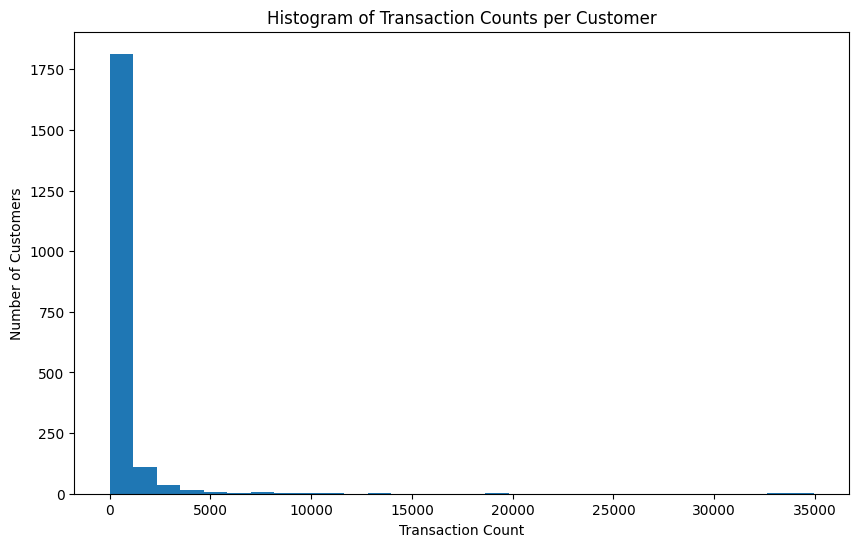

In [58]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(total['transaction_count'], bins=30)

# Labels and title
plt.xlabel("Transaction Count")
plt.ylabel("Number of Customers")
plt.title("Histogram of Transaction Counts per Customer")

# Show plot
plt.show()
